# Adaptive Monitoring Pipeline
Adaptive recording workflows are derived to control the permanent laser scanner. The data acquisition is adapted by the system according to defined rules applied on the captured data. The spatial extent and resolution as well as the time interval of the recording can be adapted to ultimately better recognize and classify the detected changes.

## Workflow and example
As a proof of concept and in order to maintain generalisability and independent of specific scanning device manufacturers, we use virtual laser scanning (VLS) of dynamic 3D scenes.
In standard mode, the VLS setup has the same scanner position, scan settings and interval from the study site in Trier. In adaptive mode, the extension we propose, a signal is sent to the scanner at the end of the hierarchical change analysis, indicating whether there was change between the last two epochs. If so, the field of view is restricted to the detected change and the horizontal and vertical scan resolutions are both doubled. With these settings, a recording is made at a 30 minutes interval instead of 60 minutes. In addition, for completeness, a standard scan is also recorded to ensure that no changes are missed. A 3D model of the area under investigation is used as the basic scene. We simulate a rock topple with a subsequent rock fall. We show that under given circumstances, subsequent changes can be recognised more quickly and in higher resolution.

The following table gives an overview of the scenario that is used to test the adaptive monitoring scenario.
| Scene name            | S0: Initial scene      | S1: Rock topple      | S2: Rock fall       |
|-----------------------|------------------------|----------------------|---------------------|
| **Change occurs at:** | No change until 12:50  | At 12:50             | At 13:10            |
| **Earliest detection via adaptive monitoring** | 12:00               | 13:00                | **13:30**           |
| **Earliest detection via regular monitoring**  | 12:00               | 13:00                | 14:00               |


This notebook demonstrates how to run the `adaptive_pipeline.py` script with the standard and adaptive modes. It includes a single code cell to launch the simulation and change-detection pipeline.

**Key steps:**
1. **Standard vs Adaptive Mode**: Standard mode uses fixed intervals (60 min overview scans), adaptive mode reduces interval to 30 min after detecting change.
2. **Overview & Detail Scans**: Overview scan always runs; detail (high‐res) scan runs when change detected and FOV updated.
3. **Change Detection**: VAPC-based change detection flags areas of significant change, triggers M3C2 and clustering.
4. **Parameters**: Set `--helios_root`, `--output_folder`, and optionally `--adaptive`.


## Adaptive monitoring scenario

<img src="../img/adaptive_monitoring.gif" width="650">

## Install HELIOS++ and copy the test data
* To install pyhelios, follow the instructions given in the [Development installation](https://github.com/3dgeo-heidelberg/helios?tab=readme-ov-file#development-installation) section of the HELIOS++ repositiory
* Using the path to the HELIOS++ root folder, you can execute the next cell to unzip the data required for the lidar simulation

Tips and tricks:
- It is strongly advised to install HELIOS++ from source by following the development installation instructions
- For **Linux users**, it may be **required** to install HELIOS++ before installing AImon in the conda environment. In that case...
<br>
    **A.** Follow the HELIOS++ [Development installation](https://github.com/3dgeo-heidelberg/helios?tab=readme-ov-file#development-installation) first
<br>
    **B.** Start the [AImon installation](https://github.com/3dgeo-heidelberg/AImon/tree/main?tab=readme-ov-file#-installation-with-a-conda-environment) from step **2.**


In [1]:
# importing the zipfile module
from aimon import utilities
from zipfile import ZipFile 
import os
# Set current directory to the location of the notebook (works even if __file__ is not defined)
try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()

current_dir = os.path.dirname(current_dir)
os.chdir(current_dir)

In [ ]:
helios_root = r"/Your/HeliosPlusPlus/Root/Folder"   # Replace with your own HELIOS++ root folder, for example:
                                                    #   helios_root = r"/home/UserName/Documents/GitHub/helios"     #   <-- Linux users
                                                    #   helios_root = r"C:\Users\UserName\repos\helios"             #   <-- Windows users

if not os.path.exists(helios_root):
    msg = f"HELIOS++ root path does not exists ({helios_root})"
    raise ValueError(msg)

zip_path = r"../test_data/data_for_aimon.zip"

#Unzip the data to the helios root directory
with ZipFile(zip_path, 'r') as z_object: 
    # Extracting all the members of the zip folder
    z_object.extractall(path=helios_root) 


## Running the adaptive monitoring system

The output point clouds will be generated for the standard and adaptive mode in their respective folder in the HELIOS++ root folder.

In [ ]:
# Define parameters
output_folder_standard_mode = os.path.join(helios_root, r"out/adaptive_monitoring/standard_mode/")
output_folder_adaptive_mode = os.path.join(helios_root, r"out/adaptive_monitoring/adaptive_mode/")

os.makedirs(output_folder_standard_mode, exist_ok=True)
os.makedirs(output_folder_adaptive_mode, exist_ok=True)

# Run in adaptive mode
!python ../src/aimon/adaptive_pipeline.py --helios_root {helios_root} --output_folder {output_folder_adaptive_mode} --adaptive

# Run in standard mode
!python ../src/aimon/adaptive_pipeline.py --helios_root {helios_root} --output_folder {output_folder_standard_mode}

<div class="aside">
<details>
  <summary>Cell output</summary>
  <pre><code>

Working on time: 12_00
./assets
./output
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 5.078622538014315 seconds
Simulation is started!

Simulation has finished.
Working on time: 13_00
./assets
./output
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 5.2964377460302785 seconds
Simulation is started!

Simulation has finished.
Comparing /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/adaptive_mode/12_00/12_00_overview.laz and /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/adaptive_mode/13_00/13_00_overview.laz
[2025-07-01 11:22:50][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:22:50][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:22:50][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:22:50][INFO] Building KDTree structure with leaf parameter 10
Working on time: 13_30
./assets
./output
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 5.642959237913601 seconds
Simulation is started!

Simulation has finished.
./assets
./output
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 2.110556053929031 seconds
Simulation is started!

Simulation has finished.
Comparing /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/adaptive_mode/13_00/13_00_overview.laz and /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/adaptive_mode/13_30/13_30_high_res.laz
[2025-07-01 11:23:31][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:23:31][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:23:31][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:23:31][INFO] Building KDTree structure with leaf parameter 10
Comparing /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/adaptive_mode/13_00/13_00_overview.laz and /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/adaptive_mode/13_30/13_30_overview.laz
[2025-07-01 11:23:41][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:23:41][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:23:41][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:23:41][INFO] Building KDTree structure with leaf parameter 10
Working on time: 14_00
./assets
./output
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 2.0600203389767557 seconds
Simulation is started!

Simulation has finished.
./assets
./output
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 1.9954630809370428 seconds
Simulation is started!

Simulation has finished.
Comparing /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/adaptive_mode/13_30/13_30_overview.laz and /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/adaptive_mode/14_00/14_00_overview.laz
[2025-07-01 11:24:28][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:24:28][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:24:28][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:24:28][INFO] Building KDTree structure with leaf parameter 10
M3C2 output file /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/adaptive_mode/14_00/250101_133000__250101_140000_m3c2_overview_to_overview.laz does not exist --> No change detected.
Working on time: 15_00
./assets
./output
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 2.3159525679657236 seconds
Simulation is started!

Simulation has finished.
./assets
./output
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 2.1723944479599595 seconds
Simulation is started!

Simulation has finished.
Comparing /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/adaptive_mode/14_00/14_00_overview.laz and /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/adaptive_mode/15_00/15_00_overview.laz
[2025-07-01 11:25:15][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:25:15][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:25:15][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:25:15][INFO] Building KDTree structure with leaf parameter 10
M3C2 output file /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/adaptive_mode/15_00/250101_140000__250101_150000_m3c2_overview_to_overview.laz does not exist --> No change detected.
Reached last epoch. Exiting loop.
Working on time: 12_00
./assets
./output
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 2.2420419900445268 seconds
Simulation is started!

Simulation has finished.
Working on time: 13_00
./assets
./output
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 2.0944864079356194 seconds
Simulation is started!

Simulation has finished.
Comparing /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/standard_mode/12_00/12_00_overview.laz and /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/standard_mode/13_00/13_00_overview.laz
[2025-07-01 11:26:36][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:26:36][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:26:37][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:26:37][INFO] Building KDTree structure with leaf parameter 10
Working on time: 14_00
./assets
./output
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 1.9847261499380693 seconds
Simulation is started!

Simulation has finished.
Comparing /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/standard_mode/13_00/13_00_overview.laz and /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/standard_mode/14_00/14_00_overview.laz
[2025-07-01 11:27:17][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:27:17][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:27:17][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:27:17][INFO] Building KDTree structure with leaf parameter 10
Working on time: 15_00
./assets
./output
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 1.996971743996255 seconds
Simulation is started!

Simulation has finished.
Comparing /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/standard_mode/14_00/14_00_overview.laz and /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/standard_mode/15_00/15_00_overview.laz
[2025-07-01 11:27:57][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:27:57][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:27:57][INFO] Building KDTree structure with leaf parameter 10
[2025-07-01 11:27:57][INFO] Building KDTree structure with leaf parameter 10
M3C2 output file /home/UserName/Documents/GitHub/helios/out/adaptive_monitoring/standard_mode/15_00/250101_140000__250101_150000_m3c2_overview_to_overview.laz does not exist --> No change detected.
Reached last epoch. Exiting loop.

  </code></pre>
</details>
</div>

## Change event projection
### Adaptive mode: OFF

Projection of change events occuring from 12h00 to 13h00


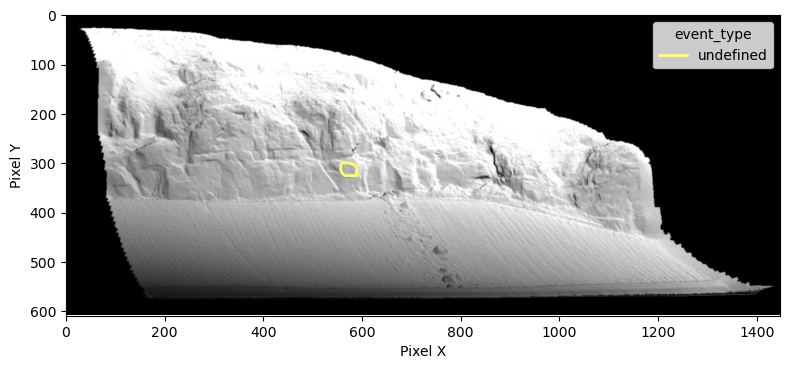

Projection of change events occuring from 13h00 to 14h00


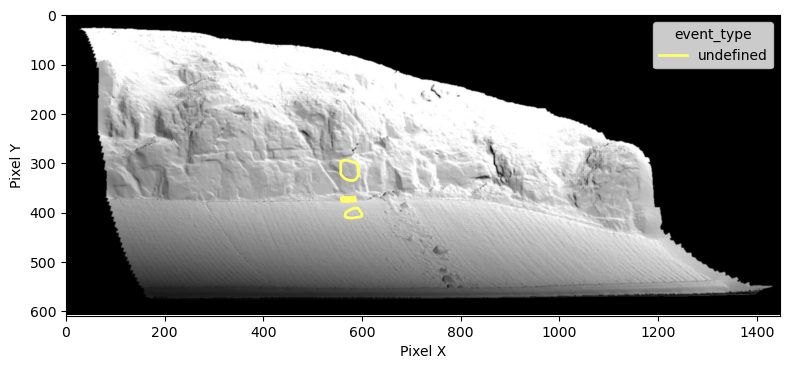

In [4]:
img_path = os.path.join(helios_root, "out/adaptive_monitoring/standard_mode/12_00/12_00_overview_RangeImage.tif")

print("Projection of change events occuring from 12h00 to 13h00")
change_event_file = os.path.join(helios_root, "out/adaptive_monitoring/standard_mode/13_00/overview_to_overview/13_00_overview_overview_to_overview_change_events_pixel.geojson")
utilities.plot_change_events(change_event_file, img_path, 'event_type')

print("Projection of change events occuring from 13h00 to 14h00")
change_event_file = os.path.join(helios_root, "out/adaptive_monitoring/standard_mode/14_00/overview_to_overview/14_00_overview_overview_to_overview_change_events_pixel.geojson")
utilities.plot_change_events(change_event_file, img_path, 'event_type')

### Adaptive mode: ON

Projection of change events occuring from 12h00 to 13h00


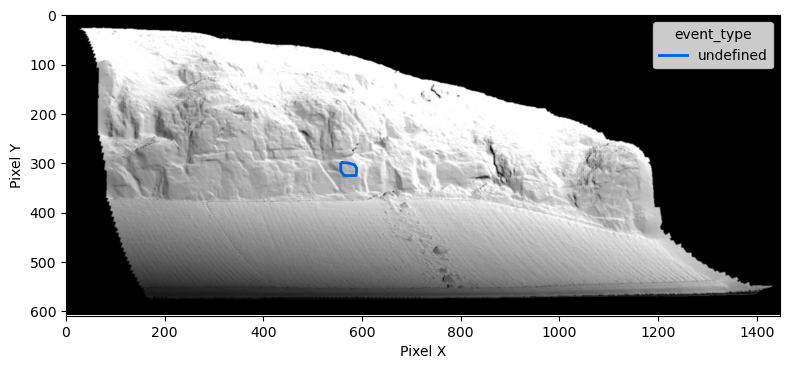

Projection of change events occuring from 13h00 to 13h30 in the high resolution scan


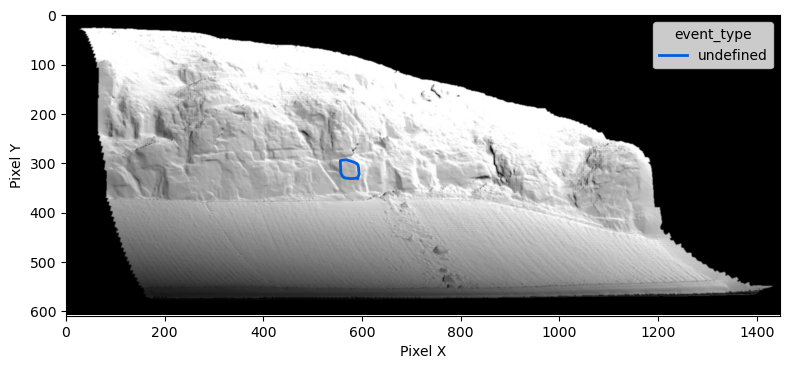

Projection of change events occuring from 13h00 to 13h30 in the overview scan


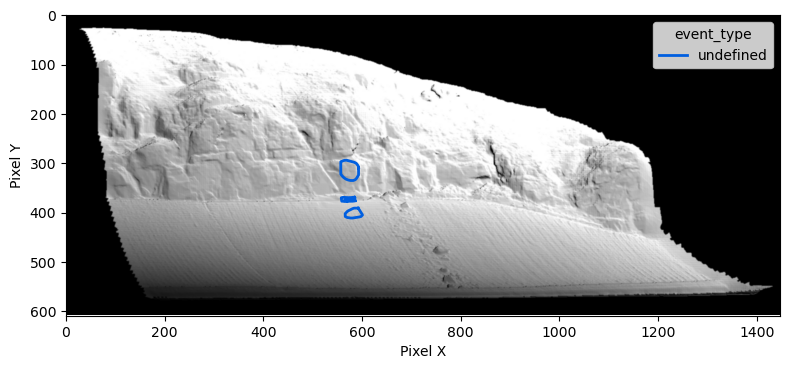

In [5]:
img_path = os.path.join(helios_root, "out/adaptive_monitoring/adaptive_mode/12_00/12_00_overview_RangeImage.tif")

print("Projection of change events occuring from 12h00 to 13h00")
change_event_file = os.path.join(helios_root, "out/adaptive_monitoring/adaptive_mode/13_00/overview_to_overview/13_00_overview_overview_to_overview_change_events_pixel.geojson")
utilities.plot_change_events(change_event_file, img_path, 'event_type', colors=["#005fe0"])

print("Projection of change events occuring from 13h00 to 13h30 in the high resolution scan")
change_event_file = os.path.join(helios_root, "out/adaptive_monitoring/adaptive_mode/13_30/high_res_to_overview/13_30_overview_high_res_to_overview_change_events_pixel.geojson")
utilities.plot_change_events(change_event_file, img_path, 'event_type', colors=["#005fe0"])

print("Projection of change events occuring from 13h00 to 13h30 in the overview scan")
change_event_file = os.path.join(helios_root, "out/adaptive_monitoring/adaptive_mode/13_30/overview_to_overview/13_30_overview_overview_to_overview_change_events_pixel.geojson")
utilities.plot_change_events(change_event_file, img_path, 'event_type', colors=["#005fe0"])